In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
def extend(a, b):
    big, small = 1.01, 0.01
    return big*a-small*b, big*b-small*a

准确率：100.0%


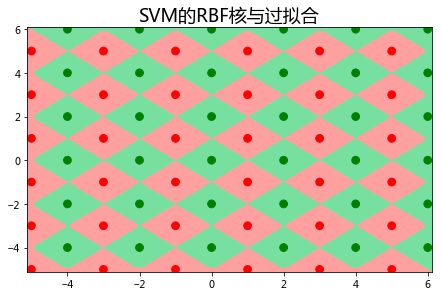

In [3]:
if __name__ == "__main__":
    t = np.linspace(-5, 5, 6)
    t1, t2 = np.meshgrid(t, t)
    x1 = np.stack((t1.ravel(), t2.ravel()), axis=1)
    N = len(x1)
    x2 = x1 + (1, 1)
    x = np.concatenate((x1, x2))
    y = np.array([1]*N + [-1]*N)

    clf = svm.SVC(C=0.1, kernel='rbf', gamma=5)
    clf.fit(x, y)
    y_hat = clf.predict(x)
    print '准确率：%.1f%%' % (np.mean(y_hat == y) * 100)

    # mpl.rcParams['font.sans-serif'] = [u'SimHei']
    # mpl.rcParams['axes.unicode_minus'] = False
    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())  # 第0列的范围
    x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    grid_hat = clf.predict(grid_test)
    grid_hat.shape = x1.shape  # 使之与输入的形状相同
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], s=60, c=y, marker='o', cmap=cm_dark)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title(u'SVM的RBF核与过拟合', fontsize=18)
    plt.tight_layout(0.2)
    plt.show()